In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

In [10]:
engine = create_engine('sqlite:///../data/temperture_change.db')
temp_df = pd.read_sql_table('data', engine)
engine = create_engine('sqlite:///../data/emissions_totals.db')
emissions_df = pd.read_sql_table('data', engine)
print(f"The number of rows in the temperature data is {temp_df.shape[0]} and the number of columns is {temp_df.shape[1]}")
print(f"The number of rows in the emissions data is {emissions_df.shape[0]} and the number of columns is {emissions_df.shape[1]}")


The number of rows in the temperature data is 799 and the number of columns is 28
The number of rows in the emissions data is 1864 and the number of columns is 28


In [2]:
temp_df = temp_df[temp_df['Area'] == 'Germany']
temp_df.head()

,Area,Months,Element,Unit,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
255,Germany,January,Temperature change,°c,1.662,1.662,1.915,0.462,0.602,2.736,...,3.150,2.951,1.833,-0.984,4.447,1.330,4.355,1.396,3.519,4.237
256,Germany,February,Temperature change,°c,3.787,2.239,4.935,-1.682,2.360,-1.034,...,4.374,0.986,3.350,3.027,-1.688,4.382,5.178,2.032,4.359,3.317
257,Germany,March,Temperature change,°c,1.928,1.106,2.289,2.316,0.839,0.352,...,3.941,2.069,0.938,4.030,-0.791,3.340,2.040,1.696,2.135,2.577
258,Germany,April,Temperature change,°c,2.837,-0.042,0.853,1.076,2.019,1.935,...,3.605,1.230,0.908,0.333,4.945,2.404,3.113,-1.031,0.570,0.327
259,Germany,May,Temperature change,°c,2.887,2.421,2.006,2.363,-0.215,1.068,...,0.776,0.595,1.932,2.399,4.244,-0.758,0.190,-0.848,2.685,1.287


In [3]:
emissions_df = emissions_df[emissions_df['Area'] == 'Germany']
emissions_df = emissions_df[emissions_df['Element'] == 'Emissions (CO2eq) (AR5)']
emissions_df.head()

,Area,Item,Element,Unit,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
628,Germany,Crop Residues,Emissions (CO2eq) (AR5),kt,2570.0230,2761.0615,2431.1365,2245.1860,2862.0000,2610.2765,...,2914.7350,2775.8485,2587.4865,2602.9095,2196.5850,2547.6040,2485.4350,2429.9440,2801.3945,2798.5325
633,Germany,Burning - Crop residues,Emissions (CO2eq) (AR5),kt,145.7856,146.4473,151.0667,155.2342,160.6426,161.2483,...,166.5574,166.5126,159.7724,161.2791,153.0378,156.5856,146.2487,151.2220,152.7636,152.7440
636,Germany,Enteric Fermentation,Emissions (CO2eq) (AR5),kt,33118.8872,32828.7876,32166.1312,31111.2200,30235.5312,29868.4288,...,29315.9776,29120.3528,28739.3008,28422.9848,27680.5648,27017.2728,26314.2124,25655.2184,28359.0104,26344.3740
643,Germany,Manure Management,Emissions (CO2eq) (AR5),kt,12387.0721,12340.8117,12255.9816,12088.3917,11768.4839,11916.9371,...,12199.3650,12039.3437,11923.6638,11903.4248,11559.9425,11350.2425,11217.4983,10641.1871,11701.8512,11192.0365
648,Germany,Manure left on Pasture,Emissions (CO2eq) (AR5),kt,2960.3415,2941.6060,2892.1040,2793.2590,2714.2360,2675.5195,...,2520.8920,2512.4120,2489.2775,2458.6435,2399.7340,2343.2890,2280.1395,2235.0895,2522.2700,2349.9935


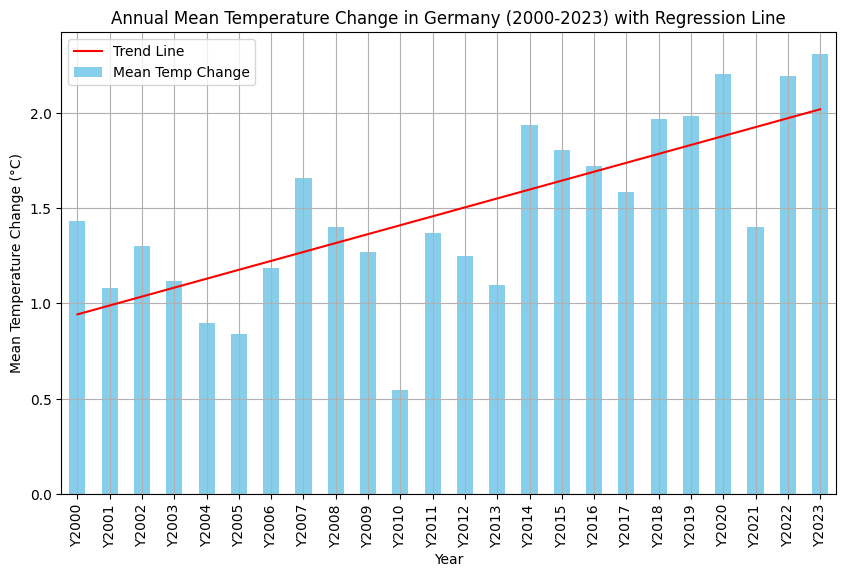

In [11]:
yearly_data = temp_df.loc[:, 'Y2000':]
# Calculate the mean temperature change for each year across all months
annual_mean_temps = yearly_data.mean()
# Prepare data for regression model
X = np.arange(len(annual_mean_temps)).reshape(-1, 1) 
y = annual_mean_temps.values  
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
annual_mean_temps.plot(kind='bar', color='skyblue', label='Mean Temp Change')
plt.plot(annual_mean_temps.index, y_pred, color='red', label='Trend Line')
plt.title('Annual Mean Temperature Change in Germany (2000-2023) with Regression Line')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Change (°C)')
plt.grid(True)
plt.legend()
plt.show()

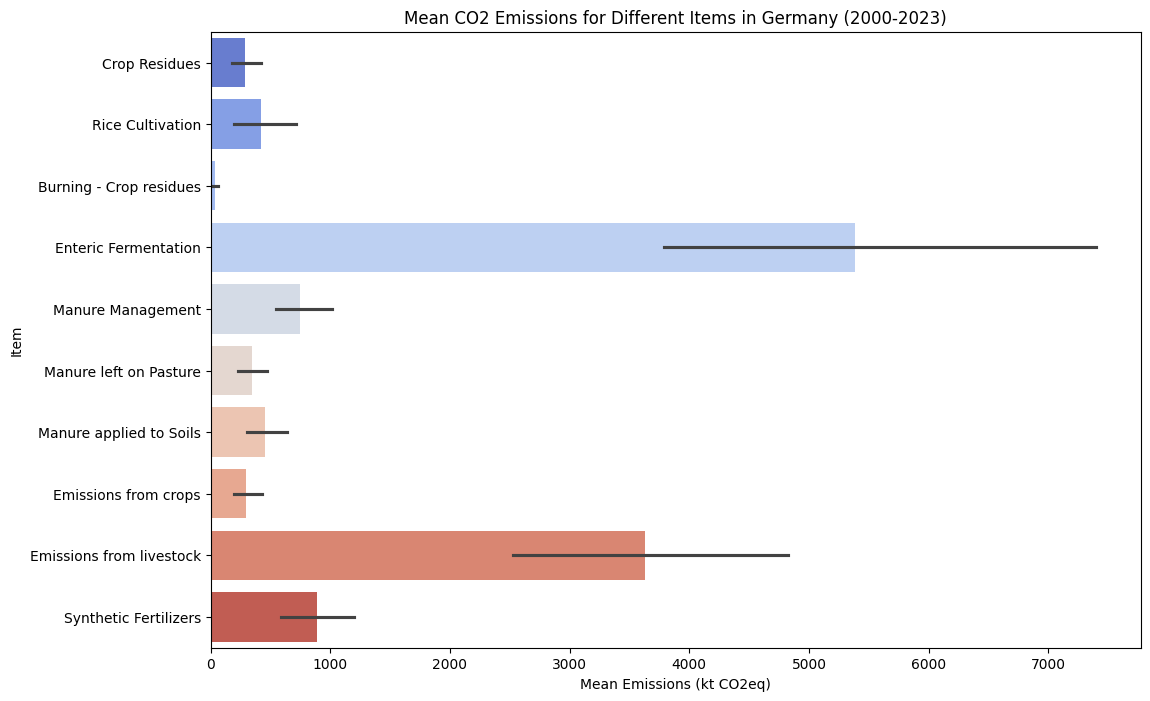

In [12]:
emissions_df['Mean Emissions'] = emissions_df.loc[:, 'Y2000':'Y2023'].mean(axis=1)
plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Emissions', y='Item', data=emissions_df, hue='Item', palette='coolwarm', dodge=False, legend=False)
plt.xlabel('Mean Emissions (kt CO2eq)')
plt.ylabel('Item')
plt.title('Mean CO2 Emissions for Different Items in Germany (2000-2023)')
plt.show()

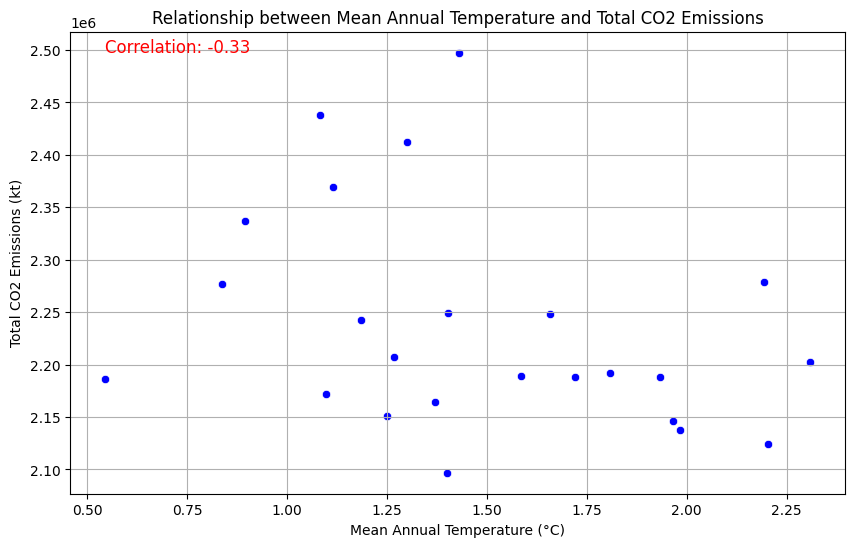

In [13]:
temp_df.columns = temp_df.columns.str.strip()
emissions_df.columns = emissions_df.columns.str.strip()
temp_data_mean = temp_df.loc[:, 'Y2000':].mean()
annual_temp = temp_data_mean.rename(lambda x: x.replace('Y', '')).to_frame('Mean_Temperature')
# Calculate the total CO2 emissions for each year
co2_data_sum = emissions_df.loc[:, 'Y2000':].sum()
annual_co2 = co2_data_sum.rename(lambda x: x.strip().replace('Y', '')).to_frame('Total_CO2_Emissions')
# Merge the temperature and CO2 data on year
annual_data = annual_temp.merge(annual_co2, left_index=True, right_index=True)
annual_data.reset_index(inplace=True)
annual_data.rename(columns={'index': 'Year'}, inplace=True)
annual_data['Year'] = annual_data['Year'].astype(int)
# Calculate the correlation
correlation = annual_data[['Mean_Temperature', 'Total_CO2_Emissions']].corr()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=annual_data, x='Mean_Temperature', y='Total_CO2_Emissions', color='blue')
plt.title('Relationship between Mean Annual Temperature and Total CO2 Emissions')
plt.xlabel('Mean Annual Temperature (°C)')
plt.ylabel('Total CO2 Emissions (kt)')
plt.text(x=annual_data['Mean_Temperature'].min(), 
         y=annual_data['Total_CO2_Emissions'].max(), 
         s=f'Correlation: {correlation.iloc[0,1]:.2f}',
         fontdict=dict(color='red', size=12))
plt.grid(True)
plt.show()